# Unit 4: Applied Machine Learning 2
## Task 5: Decision trees and random forest
###### Candelaria Retamal
###### **22.06.2022**


#### 5.1. Decision trees depth of 3
What accuracy can you achieve using a decision trees with a depth of 3? Plot the corresponding decision tree with plot_tree()

---

> **Solution**: I first load the database and then implement a decision tree of depth 3.

In [8]:
import numpy as np
import os

# Load data
with np.load("features_trainset.npz") as npz_file:
    X_tr = npz_file["data"]
    y_tr = npz_file["label"]

print("X train:", X_tr.shape, X_tr.dtype)
print("y train:", y_tr.shape, y_tr.dtype)

with np.load("features_testset.npz") as npz_file:
    X_te = npz_file["data"]
    y_te = npz_file["label"]

# print("X:", X_tr.shape, X_tr.dtype)
# print("y:", y_tr.shape, y_tr.dtype)

print("X test:", X_te.shape, X_te.dtype)
print("y test:", y_te.shape, y_te.dtype)

# Convert to float
X_tr = X_tr.astype(np.float)
X_te = X_te.astype(np.float)
# Print the new data type
print('dtype:', X_tr.dtype)
print('dtype:', X_te.dtype)

X train: (280, 1280) float32
y train: (280, 6) float32
X test: (50, 1280) float32
y test: (50, 6) float32
dtype: float64
dtype: float64


In [11]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)

In [12]:
# Fit decision tree
dt.fit(X_tr, y_tr)

# Get score
dt.score(X_tr, y_tr)

0.6357142857142857

The accuracy is of 63.6%. Later, I plot the tree.

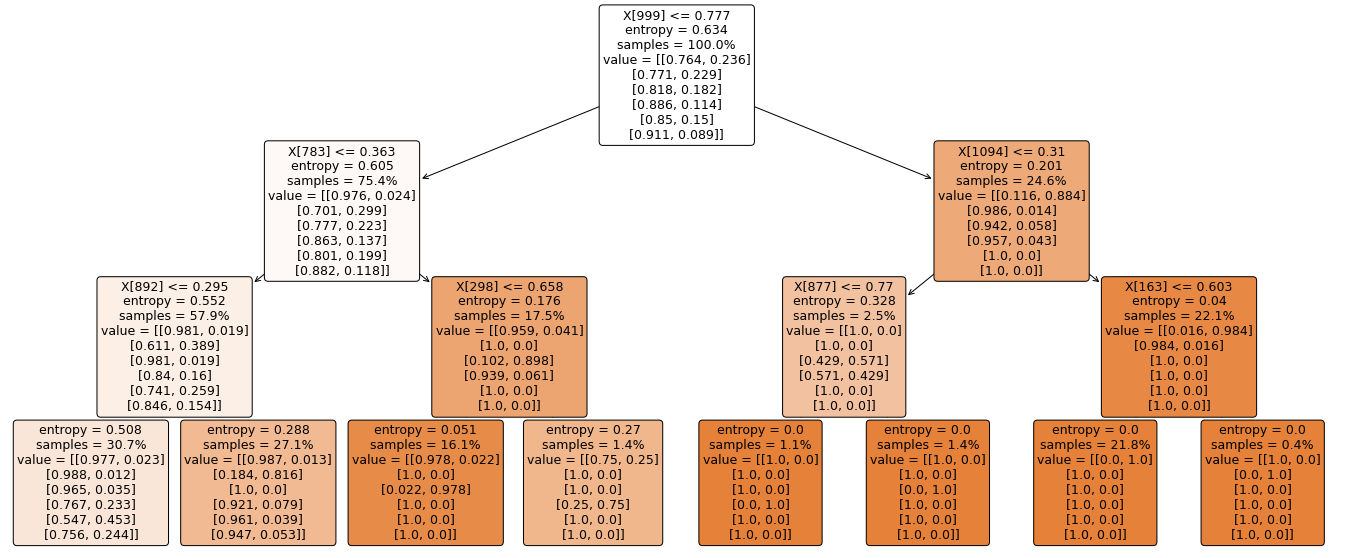

In [15]:
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 10))
plot_tree(
    dt,
    filled=True,
    rounded=True,
    proportion=True,
)
plt.show()

#### 5.2. Tune Depth
Tune the depth of your decision tree. Does it improve the accuracy?

---

> **Solution**: First I find the optimal depth and compute the decision tree with this parameter.

In [35]:
# Hyper parameters range intialization for tuning 

parameters={"max_depth" : [1,3,5,7,9,11,12]}

# calculating different regression metrics

from sklearn.model_selection import GridSearchCV
tuning_model = GridSearchCV(dt, param_grid = parameters)
tuning_model.fit(X_tr, y_tr)
# best hyperparameters 
print('Optimal depth: '+str(tuning_model.best_params_['max_depth'])+' layers')


Optimal depth: 5 layers


In [31]:
a = tuning_model.best_params_
a['max_depth']

dt_tuned = DecisionTreeClassifier(criterion="entropy", max_depth=tuning_model.best_params_['max_depth'], random_state=0)
# Fit decision tree
dt_tuned.fit(X_tr, y_tr)

# Get score
dt_tuned.score(X_tr, y_tr)

0.9035714285714286

The results improved from 63.5% to 90%.

#### 5.3. Random forest
Try a random forest model and tune the number of trees and their depth. 
* Does increasing the number of trees help? 
* Is there an optimal depth and how does it compare to your decision tree above?

---

> **Solution**: I repeat the previous steps but now with more trees in a random forest model.

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Create a decision tree
rf = RandomForestClassifier(n_estimators=1, max_depth=3, random_state=0)

# Fit estimator
rf.fit(X_tr, y_tr)
rf.score(X_tr, y_tr)

0.6821428571428572

The result of a single random forest of depth 3 and 1 estimator is equal to 68.2%. This result is a bit better than the single decision tree from before.

Now I set a GridSearch for finding the optimal parameters to increase the accuracy.

In [44]:
parameters={"max_depth" : [1,3,5,7,9,11,12,None], 
            "n_estimators" : [2,3,4,5,6,7,8,9,10,15,20,25,50,100,200]}

from sklearn.model_selection import GridSearchCV
rf_tune_model=GridSearchCV(rf,param_grid=parameters)
rf_tune_model.fit(X_tr, y_tr)
# best hyperparameters 
print(rf_tune_model.best_params_)
# Accuracy
# Get score


{'max_depth': 7, 'n_estimators': 3}


In [45]:
rf_optimal = RandomForestClassifier(n_estimators=rf_tune_model.best_params_['n_estimators'],
                                    max_depth=rf_tune_model.best_params_['max_depth'], 
                                    random_state=0)
rf_optimal.fit(X_tr, y_tr)
rf_optimal.score(X_tr, y_tr)

0.9107142857142857

The results show an increase for the random forest from ~68 to 91.1%. This result is also better than the single decision tree of depth 5 found in the previous section.

#### 5.4. Importance of features

The random forest estimator provides a ranking of the features according to their importance in the classification task via thefeature_importances_ attribute. Find the the top 5 important features and visualize their importance scores.

---

> **Solution**: I found the most important features and show them in a chart with red dots.

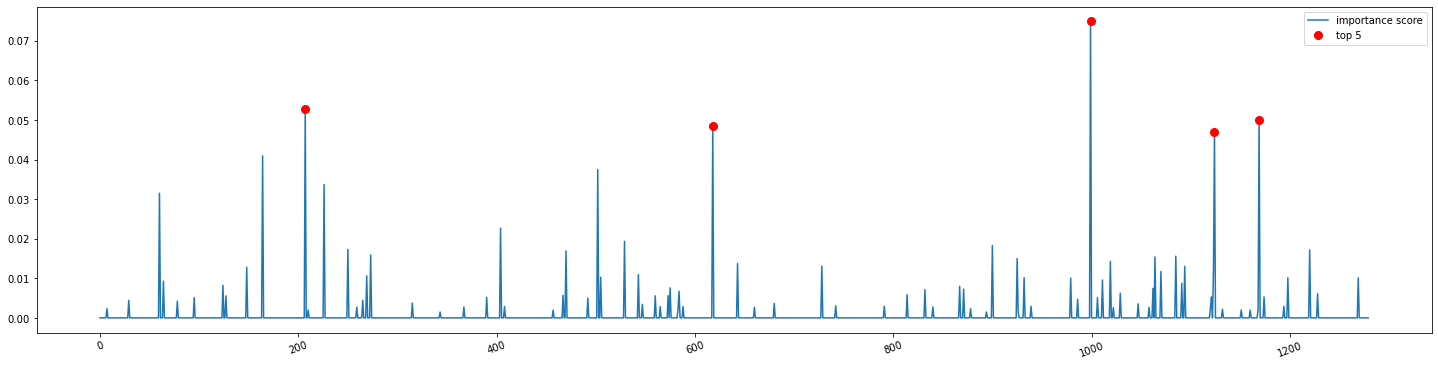

The top 5 most important features with their scores are:
- 208	 -> 0.053
- 619	 -> 0.048
- 1000	 -> 0.075
- 1125	 -> 0.047
- 1170	 -> 0.050


In [112]:
scores = []
predicitions = []
clfs = []
classifiers = {"Random Forest": rf_optimal}

for name in classifiers:

    # Select classifier
    clf = classifiers[name]

    # Train classifier
    clf.fit(X_tr, y_tr)
    clfs.append(clf)

    # Collect multiple model outputs
    scores.append(clf.score(X_tr, y_tr))
    predicitions.append(clf.predict(X_te))



clfs.append(classifiers["Random Forest"])
plt.figure(figsize=(25, 6))
for model in ['Random Forest']:
    importances = clfs[list(classifiers.keys()).index(model)].feature_importances_
    top5index = sorted(range(len(importances)), key = lambda sub: importances[sub])[-5:]
    
#     importances.sort()
    plt.plot(importances[:],'-',label='importance score')
    plt.plot(top5index,importances[top5index],'ro',label='top 5', markersize=8)
plt.xticks(rotation=20)
plt.legend()
plt.show()

print('The top 5 most important features with their scores are:')
for i in sorted(top5index): print('- ' + str(i+1)+'\t -> '+
                                  str("{:.3f}".format(importances[i])))


#### 5.5. Compare the results

Are these top features similar to the ones you found based on the coefficients in the logistic regression task, and also during the data exploration in the last question of Task 1?

---

> **Solution**:
The results obtained are different to the ones found before in Task 1. This makes me think that, even having the same features, different models make more important different things. This way you can have similar accuracy but different features as the most relevant for classification.  